In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

from dataloading.nvidia import NvidiaResizeAndCrop, Normalize, NvidiaDataset
from network import PilotNet
from trainer import Trainer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
root_path = Path("/home/romet/data/datasets/ut/nvidia-data")

train_paths = [root_path / "2021-05-20-12-36-10_e2e_sulaoja_20_30",
               root_path / "2021-05-20-12-43-17_e2e_sulaoja_20_30", 
               root_path / "2021-05-20-12-51-29_e2e_sulaoja_20_30",
               root_path / "2021-05-20-13-44-06_e2e_sulaoja_10_10",
               root_path / "2021-05-20-13-51-21_e2e_sulaoja_10_10",
               root_path / "2021-05-20-13-59-00_e2e_sulaoja_10_10",
               root_path / "2021-05-28-15-07-56_e2e_sulaoja_20_30",
               root_path / "2021-05-28-15-17-19_e2e_sulaoja_20_30"
              ]

tr = transforms.Compose([NvidiaResizeAndCrop(), Normalize()])
trainset = NvidiaDataset(train_paths, transform=tr)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True,
                                         num_workers=6, pin_memory=True, persistent_workers=True)

In [9]:
len(trainset.steering_angles)

51222

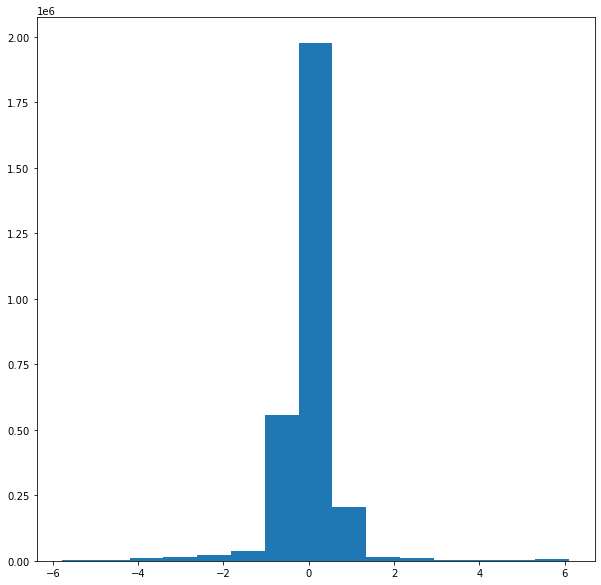

In [21]:
plt.figure(figsize=(10,10))
plt.hist(np.array(trainset.steering_angles*56), bins=15);